In [1]:
from __future__ import print_function
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

from stability_diagrams import plot_stability_ssms
from stability_diagrams import plot_stability_lmm

# HW 5:  ODE Methods - Initial Value Problems

These questions will use a mixture of scipy routines and hand-rolled ODE solver methods (which you can use from the notes)

## Question 1 - The SIR model for Infectious diseases

ODE based models are a classical approach to understanding the spread of infectious diseases.

One of the pioneering models is the SIR model of [Kermack and McKendrick, (1927)](https://royalsocietypublishing.org/doi/10.1098/rspa.1927.0118) which is a mean-field theory for large populations that assumes the general population can be divided into three subgroups

* $S$: the number of susceptible patients
* $I$: the number of infected patients
* $R$: the number of recovered (or otherwise) patients

Given these definitions, the simplest dynamical systems for the three populations can be written

$$
\begin{aligned}
\frac{d S}{dt} &= -\alpha SI \\
\frac{d I}{dt} &= \alpha SI -\beta I\\
\frac{d R}{dt} &= \beta I \\
\end{aligned}
$$

where $\alpha$ is the infection rate per person, and $\beta$ is the recovery rate (hint: check the units) 

This is the original Kermack and McKendrick model.  We will discuss a host of themes and variations later.  If you are interested [Siettos and Russo, (2013)](https://doi.org/10.4161/viru.24041) provides a short overview of the much larger field of epidemiology modeling (although this paper has some significant mistakes with respect to the analysis of the Kermack and McKendrick model, and I'm sure there are considerably more papers on modeling epidemics now).

We will explore this problem through a combination of Analysis and Numerical methods and to use it to test different methods for ODE solvers.


**(a)** [4] First try to explain in words,  what this system of ODE's describes

This systen of ODE's describes the changes in susceptible, infected, or recovered patients over time, as functions of each other and the infection and recovery rates. 

### Some analysis.  

Here we will conduct some elementary dimensional analysis to reduce the parameter space.  More detailed analysis of this system can be found  in Steve Strogatz' excellent text on [dynamical systems](https://smile.amazon.com/Nonlinear-Dynamics-Chaos-Applications-Nonlinearity/dp/0813349109/ref=dp_ob_image_bk)

**(b)** [2] Show that the SIR equations imply that   $S + I + R = N$  where $N$ is a constant (the total population of susceptible people that can all interact)

The given equations are:

$$
\frac{dS}{dt} = -\alpha SI
$$
$$
\frac{dI}{dt} = \alpha SI - \beta I
$$
$$
\frac{dR}{dt} = \beta I
$$

Add these equations together:
$$
\frac{dS}{dt} + \frac{dI}{dt} + \frac{dR}{dt} = (-\alpha SI) + (\alpha SI - \beta I) + (\beta I)
$$

### Step 2: Simplify the right-hand side
On the right-hand side, observe that:
$$
(-\alpha SI) + (\alpha SI) - (\beta I) + (\beta I) = 0
$$

Thus:
$$
\frac{dS}{dt} + \frac{dI}{dt} + \frac{dR}{dt} = 0
$$

### Step 3: Interpret the result
The equation $\frac{dS}{dt} + \frac{dI}{dt} + \frac{dR}{dt} = 0$ implies that the total rate of change of $S + I + R$ is zero:
$$
\frac{d}{dt}(S + I + R) = 0
$$

### Step 4: Conclude that $S + I + R = N$
If the derivative of $S + I + R$ with respect to time is zero, it follows that $S + I + R$ is constant over time. Let this constant be $N$, the total population. Therefore:
$$
S + I + R = N
$$

The units of each term confirm the validity:
- $\alpha SI$ has units of $\text{population} \cdot \text{time}^{-1}$, as $\alpha$ is the infection rate per person per unit time.
- $\beta I$ also has units of $\text{population} \cdot \text{time}^{-1}$, as $\beta$ is the recovery rate per unit time.
- Thus, the equations and the conservation law $S + I + R = N$ are dimensionally consistent.

**(c)**  [4] Show that under  the change of variables (linear scaling of the variables)

$$
\begin{matrix}
    S = N s, & I = Ni, & R = Nr, & t = \tau\frac{1}{\alpha N} \\
\end{matrix}
$$

The original equations can be rewritten as the scaled equations 

$$
\begin{align}
    \frac{d s}{d\tau} &= -si\\
    \frac{d i}{d\tau} &= (s - s^*)i  \\
    \frac{d r}{d\tau} & = s^* i \\
\end{align}
$$

where 
$$
    s^* = \frac{\beta}{\alpha N}
$$



**Notes**,  
* if we write $s = S/N$ etc. then $s$ is simply the fraction of the total population that is susceptible.  
* Also show that $s + i + r = 1$.
* this scaling reduces a two-parameter problem to a one parameter problem where the only variable is $s^*$



The original SIR equations are:
$$
\frac{dS}{dt} = -\alpha SI, \quad \frac{dI}{dt} = \alpha SI - \beta I, \quad \frac{dR}{dt} = \beta I
$$
where:
- $S$, $I$, $R$ are the populations of susceptible, infected, and recovered individuals,
- $\alpha$ is the infection rate per person,
- $\beta$ is the recovery rate.

We aim to scale these equations to dimensionless variables.

### Step 2: Scaling the Variables

We introduce scaled variables:
$$
S = N s, \quad I = N i, \quad R = N r, \quad t = \tau \frac{1}{\alpha N}
$$
where:
- $s$, $i$, and $r$ are fractions of the total population $N$,
- $\tau$ is a rescaled time variable.

### Step 3: Rewrite the Derivatives

Using the chain rule, the time derivative becomes:
$$
\frac{d}{dt} = \frac{d\tau}{dt} \frac{d}{d\tau} = \alpha N \frac{d}{d\tau}.
$$

The original equations now transform as follows:

#### (a) Transform the equation for $S$:
$$
\frac{dS}{dt} = \frac{d}{dt}(N s) = N \frac{ds}{d\tau} \cdot \alpha N.
$$
Substitute $S = N s$ and $I = N i$ into $\frac{dS}{dt} = -\alpha S I$:
$$
N \cdot \alpha N \frac{ds}{d\tau} = -\alpha (N s)(N i).
$$
Divide through by $N \alpha N$:
$$
\frac{ds}{d\tau} = -s i.
$$

#### (b) Transform the equation for $I$:
$$
\frac{dI}{dt} = \frac{d}{dt}(N i) = N \frac{di}{d\tau} \cdot \alpha N.
$$
Substitute $S = N s$ and $I = N i$ into $\frac{dI}{dt} = \alpha S I - \beta I$:
$$
N \cdot \alpha N \frac{di}{d\tau} = \alpha (N s)(N i) - \beta (N i).
$$
Divide through by $N \alpha N$:
$$
\frac{di}{d\tau} = s i - \frac{\beta}{\alpha N} i.
$$
Define $s^* = \frac{\beta}{\alpha N}$:
$$
\frac{di}{d\tau} = (s - s^*) i.
$$

#### (c) Transform the equation for $R$:
$$
\frac{dR}{dt} = \frac{d}{dt}(N r) = N \frac{dr}{d\tau} \cdot \alpha N.
$$
Substitute $I = N i$ into $\frac{dR}{dt} = \beta I$:
$$
N \cdot \alpha N \frac{dr}{d\tau} = \beta (N i).
$$
Divide through by $N \alpha N$:
$$
\frac{dr}{d\tau} = s^* i.
$$

### Step 4: Scaled Equations

After scaling, the equations become:
$$
\frac{ds}{d\tau} = -s i,
$$
$$
\frac{di}{d\tau} = (s - s^*) i,
$$
$$
\frac{dr}{d\tau} = s^* i.
$$

### Step 5: Conservation Law $s + i + r = 1$

From the original equations, we know that $S + I + R = N$. Using the scaled variables:
$$
N s + N i + N r = N,
$$
divide through by $N$:
$$
s + i + r = 1.
$$

### Step 6: Dimensional Reduction

The scaled equations depend only on the parameter $s^* = \frac{\beta}{\alpha N}$, which encapsulates both the infection rate $\alpha$, the recovery rate $\beta$, and the population size $N$. This reduces the original two-parameter problem to a single-parameter problem.

### Summary

The scaled equations are:
$$
\frac{ds}{d\tau} = -s i, \quad \frac{di}{d\tau} = (s - s^*) i, \quad \frac{dr}{d\tau} = s^* i,
$$
where $s^* = \frac{\beta}{\alpha N}$, and $s + i + r = 1$. The scaling simplifies the analysis by reducing the problem to a single parameter $s^*$, with $s$, $i$, and $r$ representing fractions of the total population.


**(d)**  [2] Given that $s^*$ is a constant that only depends on the infection rate per capita $\alpha$, the recovery rate $\beta$ and the total population $N$,  interpret the equation for the change in the number of infections

$$
    \frac{d i}{d\tau} = (s - s^*) i
$$
as a function of the susceptible fraction of the population $s$.

### Key Components of the Equation
1. **Growth Term $(s - s^*)$:**
   - The term $(s - s^*)$ determines whether the number of infections is increasing or decreasing:
     - If $s > s^*$, then $(s - s^*) > 0$, leading to an increase in infections ($\frac{d i}{d\tau} > 0$).
     - If $s < s^*$, then $(s - s^*) < 0$, leading to a decrease in infections ($\frac{d i}{d\tau} < 0$).
     - If $s = s^*$, then $(s - s^*) = 0$, and the infection rate remains constant ($\frac{d i}{d\tau} = 0$).

2. **Infection Proportionality ($i$):**
   - The equation is proportional to $i$, meaning the rate of change of infections depends on the current fraction of infected individuals. If there are no infections ($i = 0$), then there can be no further spread of the disease.

So this then shows that the equation $\frac{d i}{d\tau} = (s - s^*) i$ demonstrates that the change in infections depends on:
1. The **current susceptible fraction** ($s$) relative to the threshold $s^*$,
2. The **current fraction of infections** ($i$).


A biological interpretation would be as follows: 

1. **Threshold Condition $s = s^*$:**
   - The parameter $s^* = \frac{\beta}{\alpha N}$ represents a critical threshold for the fraction of the population that is susceptible.
   - When $s > s^*$, the disease spreads because the susceptible population is large enough to sustain infection growth.
   - When $s < s^*$, the disease cannot sustain itself because the susceptible population is too small.

2. **Exponential Growth and Decay:**
   - For $s > s^*$, the infections grow exponentially in the early stages because $(s - s^*) > 0$. This is typical of outbreaks when a large portion of the population is susceptible.
   - For $s < s^*$, the infections decay exponentially, representing the disease dying out as fewer people remain susceptible.

Initially, when most of the population is susceptible ($s \approx 1$), infections grow rapidly. Over time, as $s$ decreases due to recovery or immunity, the growth slows and eventually reverses when $s < s^*$.
You can see this in the real world where infections initially spike and then decline as immunity builds up in the population.



### Numerical Methods

we will now explore the behavior of this model numerically using a range of our basic algorithms by solving the scaled dynamical system

$$
    \frac{d\mathbf{u}}{dt} = \mathbf{F}(t,\mathbf{u}, s^*),\quad\mathbf{u}(0)=\mathbf{u}_0
$$

where 
$$
    \mathbf{u} = \begin{bmatrix} s \\ i \\ r \\ \end{bmatrix}, \quad 
    \mathbf{F}(t,\mathbf{u},s^*) = \begin{bmatrix} -si \\ (s - s^*)i \\ s^*i \\ \end{bmatrix}
$$

**(e)** [4] Write function to return the RHS of the scaled dynamical system $\mathbf{F}(t,\mathbf{u},s^*)$ as a numpy array

In [2]:
def F(t, u, s_star):
    """ 
    RHS of scaled SIR model of Kermack and McKendrick
    
    Parameters
    ----------
    t: float
        Time (dummy variable since this is an autonomous system)
    u: numpy array
        Array of scaled [s, i, r] values such that sum(u) = 1 
        (s, i, r are fractions of the total population N)
    s_star: float
        Scaled critical susceptible population = β / (αN)
        
    Returns
    -------
    numpy array
        RHS of the system [ds/dt, di/dt, dr/dt]
    """
    # Unumpyack the components of u
    s, i, r = u
    
    # Compute the RHS components
    ds_dt = -s * i
    di_dt = (s - s_star) * i
    dr_dt = s_star * i
    
    # Return the RHS as a numpy array
    return numpy.array([ds_dt, di_dt, dr_dt])

In [3]:
# Let's assume the critical level of immunity is 60% of the total population
s_star = 0.6

# let there initially be .01 % infected cases and no recovered
t = 0.
i_0 = 1.e-4
u_0 = numpy.array([1. - i_0, i_0, 0.0])
answer = numpy.array([-9.999000000000001e-05,  3.999000000000001e-05, 6.000000000000000e-05])
numpy.testing.assert_allclose(F(t, u_0, s_star), answer)
print('success!')

success!


**(f)** [10] Use scipy.integrate.solve_ivp (imported above as solve_ivp),  to solve the scaled dynamical system above with for <font color="red">$s^* = 0.6$</font> and initial condition

$$
    \mathbf{u}_0 = \begin{bmatrix} 1 - i_0\\ i_0 \\ 0\\ \end{bmatrix}
$$

where $i_0=10^{-5}$ is the initially infected proportion of the available population $N$

Integrate for $t\in[0, 50]$ and make a plot showing the evolution of $s(t)$, $i(t)$, ${r}(t)$ vs. time 

**For full credit your plot should show the following**
* show the actual time-steps chosen by the adaptive solver as well as a smooth solution (use dense_output=True) 
* the total cumulative number of cases at any time
* the time and infection level of the peak of the infection (hint: use the `events`, feature of solve_ivp)
* the maximum fraction of people infected

Explore the behavior of the solutions as a function of $s^*$ and $i_0$ and try to "flatten the curve" (we will try to make that more quantitative later). Also,  explore relative and absolute tolerances to convince yourself that your solutions are well resolved.

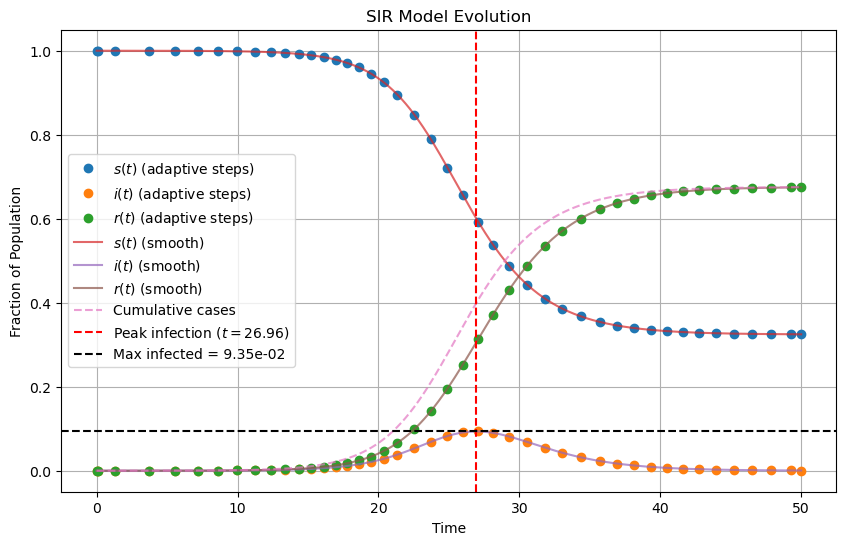

In [4]:
from functools import partial

# Define the event for the peak of infection (where di/dt = 0)
def peak_infection(t, u, s_star):
    return (u[0] - s_star) * u[1]  # di/dt = 0 at the peak

# Use functools.partial to pass s_star to the event function
wrapped_peak_infection = partial(peak_infection, s_star=s_star)
wrapped_peak_infection.terminal = False  # Event should not stop integration
wrapped_peak_infection.direction = 0     # Detect both increasing and decreasing

# Parameters
s_star = 0.6
i_0 = 1e-5
u_0 = numpy.array([1 - i_0, i_0, 0])  # Initial condition [s, i, r]
t_span = [0, 50]  # Integration time
t_eval = numpy.linspace(t_span[0], t_span[1], 500)  # Time points for smooth solution

# Solve the system
sol = solve_ivp(
    lambda t, u: F(t, u, s_star),  # Pass s_star directly in the lambda for F
    t_span,
    u_0,
    method='RK45',
    dense_output=True,
    events=wrapped_peak_infection,  # Use the wrapped event function
    atol=1e-8,
    rtol=1e-6
)

# Extract the dense solution
t_dense = numpy.linspace(t_span[0], t_span[1], 1000)
u_dense = sol.sol(t_dense)

# Compute cumulative cases (r(t) + i(t))
cumulative_cases = u_dense[2] + u_dense[1]

# Extract peak information
if sol.t_events[0].size > 0:
    t_peak = sol.t_events[0][0]
    max_infected_fraction = sol.y_events[0][0, 1]
else:
    t_peak = None
    max_infected_fraction = None

# Plot the results
plt.figure(figsize=(10, 6))

# Plot the actual time steps
plt.plot(sol.t, sol.y[0], 'o', label='$s(t)$ (adaptive steps)')
plt.plot(sol.t, sol.y[1], 'o', label='$i(t)$ (adaptive steps)')
plt.plot(sol.t, sol.y[2], 'o', label='$r(t)$ (adaptive steps)')

# Plot the smooth solution
plt.plot(t_dense, u_dense[0], '-', label='$s(t)$ (smooth)', alpha=0.7)
plt.plot(t_dense, u_dense[1], '-', label='$i(t)$ (smooth)', alpha=0.7)
plt.plot(t_dense, u_dense[2], '-', label='$r(t)$ (smooth)', alpha=0.7)

# Plot cumulative cases
plt.plot(t_dense, cumulative_cases, '--', label='Cumulative cases', alpha=0.7)

# Mark the peak infection level
if t_peak is not None:
    plt.axvline(t_peak, color='r', linestyle='--', label=f'Peak infection ($t={t_peak:.2f}$)')
    plt.axhline(max_infected_fraction, color='k', linestyle='--', label=f'Max infected = {max_infected_fraction:.2e}')

# Labels and legend
plt.title("SIR Model Evolution")
plt.xlabel("Time")
plt.ylabel("Fraction of Population")
plt.legend()
plt.grid(True)
plt.show()


**(g)** [8] Write your own code to solve the same system using any constant step-size method we discussed in class that is higher than 2nd order (you can use or modify any of the example codes from the notes and make sure it works for vector valued functions.   Your code should be able to use your function $F$ defined above. Make sure to choose a method that will work for the non-linear right-hand-side. We will test it against the output from solve_ivp with N steps uniform steps in $t\in[0,50]$.  What is the minimum number of steps does your routine take to pass the tests with a relative error of $10^{-4}$ and absolute error of $10^{-5}?.  You can control the number of steps taken with the `N=??` defined at the end of the cell.  **Extra Credit** determine the convergence rate of your method.

In [5]:
def my_ode_solver(f, t_span, u0, N):
    """Implement constant step size ODE integrator using the 4th-order Runge-Kutta method.
    
    Parameters
    ----------
        f: callable
            Vector-valued function with interface f(t, u), where u is the state vector.
        t_span: list or tuple
            Array holding the range of times to integrate over t_span = [t_min, t_max].
        u0: numpy array
            Array of initial conditions.
        N: int
            Number of time steps to take.
            
    Returns
    -------
        t: numpy array
            Array of timesteps from t_min to t_max of length N.
        u: numpy array of shape (len(u0), len(t))
            Solution array; the solution at timestep i should be u[:, i].
    """
    t_min, t_max = t_span
    h = (t_max - t_min) / N  # Step size
    t = numpy.linspace(t_min, t_max, N + 1)  # Uniform timesteps
    u = numpy.zeros((len(u0), len(t)))  # Solution array
    u[:, 0] = u0  # Initial condition

    for i in range(N):
        k1 = f(t[i], u[:, i])
        k2 = f(t[i] + h / 2, u[:, i] + h / 2 * k1)
        k3 = f(t[i] + h / 2, u[:, i] + h / 2 * k2)
        k4 = f(t[i] + h, u[:, i] + h * k3)
        u[:, i + 1] = u[:, i] + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
    
    return t, u

# Parameters
s_star = 0.6
f = lambda t, u: F(t, u, s_star)
t_span = [0., 50.]
i_0 = 1.e-5
u_0 = numpy.array([1. - i_0, i_0, 0.0])

# Test the solver
N = 100
t, u = my_ode_solver(f, t_span, u0=u_0, N=N)


# Putting the test stuff from the below cells in here just for my own convenience :P
# True solution using solve_ivp
sol = solve_ivp(f, t_span, y0=u_0, method='RK45', dense_output=True, rtol=1.e-6, atol=1.e-8)

# Assert correctness
numpy.testing.assert_allclose(u, sol.sol(t), rtol=1.e-4, atol=1.e-5)
print('success!')

success!


In [6]:
# Find minimum N for error criteria (it's 160)
N = 10  # Start with a small number of steps
success = False

while not success:
    t, u = my_ode_solver(f, t_span, u0=u_0, N=N)
    try:
        numpy.testing.assert_allclose(u, sol.sol(t), rtol=1.e-4, atol=1.e-5)
        success = True
    except AssertionError:
        N *= 2  # Double the number of steps if the test fails

print(f'Minimum N for error criteria: {N}')


Minimum N for error criteria: 160


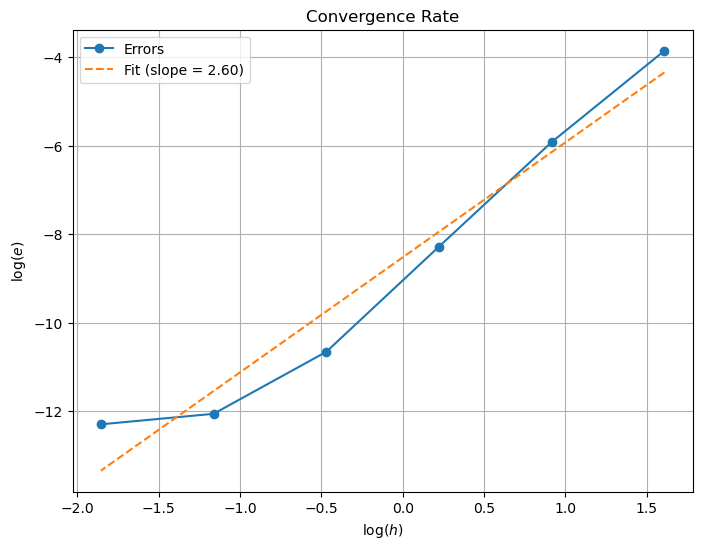

In [7]:
#EXTRA CREDIT

N_values = [10, 20, 40, 80, 160, 320]
errors = []

for N in N_values:
    t, u = my_ode_solver(f, t_span, u0=u_0, N=N)
    error = numpy.linalg.norm(u - sol.sol(t)) / numpy.linalg.norm(sol.sol(t))
    errors.append(error)

# Fit a line to log-log data
h_values = [(t_span[1] - t_span[0]) / N for N in N_values]
log_h = numpy.log(h_values)
log_errors = numpy.log(errors)
slope, intercept = numpy.polyfit(log_h, log_errors, 1)

# Plot convergence
plt.figure(figsize=(8, 6))
plt.plot(log_h, log_errors, 'o-', label='Errors')
plt.plot(log_h, slope * log_h + intercept, '--', label=f'Fit (slope = {slope:.2f})')
plt.xlabel('$\log(h)$')
plt.ylabel('$\log(e)$')
plt.title('Convergence Rate')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
s_star = 0.6
f = lambda t, u: F(t, u, s_star)

t_span = [0., 50.]
i_0 = 1.e-5
u_0 = numpy.array([1. - i_0, i_0, 0.0])


t, u = my_ode_solver(f, t_span, u_0, N)

# There was a hidden line here implementing sol = solve_ivp to get the "True" solution
sol = solve_ivp(f, t_span, u_0, method='RK45', dense_output=True, rtol=1.e-6, atol = 1.e-8)

numpy.testing.assert_allclose(u, sol.sol(t), rtol=1.e-4, atol=1.e-5)
print('success!')

success!


**(h)** [2] Reproduce your figure from the scipy version (without events)

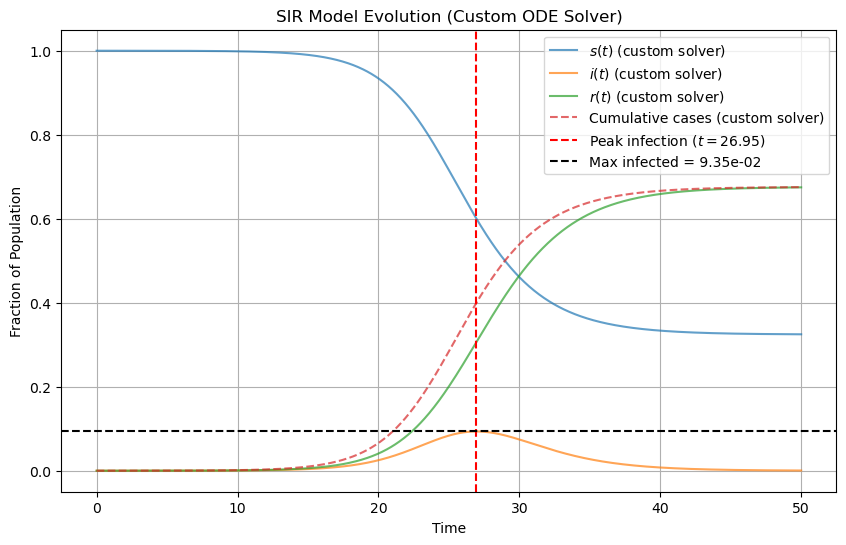

In [9]:
# Implementation of the SIR model using the custom my_ode_solver

# Replace scipy solve_ivp with custom my_ode_solver
N = 1000  # Number of steps for the custom solver
t_dense, u_dense = my_ode_solver(lambda t, u: F(t, u, s_star), t_span, u_0, N)

# Compute cumulative cases (r(t) + i(t))
cumulative_cases = u_dense[2] + u_dense[1]

# Determine the peak of infection manually for the custom solution
max_infected_fraction = numpy.max(u_dense[1])  # Maximum value of i(t)
t_peak_index = numpy.argmax(u_dense[1])        # Time index of peak infection
t_peak = t_dense[t_peak_index]             # Corresponding time value

# Plot the results
plt.figure(figsize=(10, 6))

# Plot the smooth solution from my_ode_solver
plt.plot(t_dense, u_dense[0], '-', label='$s(t)$ (custom solver)', alpha=0.7)
plt.plot(t_dense, u_dense[1], '-', label='$i(t)$ (custom solver)', alpha=0.7)
plt.plot(t_dense, u_dense[2], '-', label='$r(t)$ (custom solver)', alpha=0.7)

# Plot cumulative cases
plt.plot(t_dense, cumulative_cases, '--', label='Cumulative cases (custom solver)', alpha=0.7)

# Mark the peak infection level
plt.axvline(t_peak, color='r', linestyle='--', label=f'Peak infection ($t={t_peak:.2f}$)')
plt.axhline(max_infected_fraction, color='k', linestyle='--', label=f'Max infected = {max_infected_fraction:.2e}')

# Labels and legend
plt.title("SIR Model Evolution (Custom ODE Solver)")
plt.xlabel("Time")
plt.ylabel("Fraction of Population")
plt.legend()
plt.grid(True)
plt.show()

###  Themes and Variations -- Some project ideas

The classical Kermack and McKendric model is only one of a vast set of models used to model the spread of infection disease but assumes homogeneous mixing across the entire population.  In addition there are lots of things  to explore with even the simplest SIR model.   If you are interested in this sort of ODE model as a possible project, here are a few things you might want to explore


* Choose a fixed value of $N$ for the maximum susceptible population. Assume that maximum hospital capacity is achieved when the number of infected patients reaches $i_{max}$.  Construct a root-finding problem to find the value of $s^*$ required to keep  the peak number of infected cases $i_{peak} <= i_{max}$. 

* Consider the possibility of re-infection (ugh!).  One model of this assumes that recovered patients can become susceptible again at some rate $\lambda$.  Modify the original SIR model to include this possibility and construct a new scaled set of equations.  This will now be a 2 parameter dynamical system ($s^*$ and another parameter say $\lambda^*$.  Explore the behavior of this new problem.

* Develop a model that includes the effects of vaccinations

* Show that the original SIR model allows at most one peak in infections.  Then try to construct a better model that allows multiple peaks.

* Read [Siettos and Russo, (2013)](https://doi.org/10.4161/viru.24041) (or find a better paper) which reviews a range of epidemiology models including Stochastic SIR models. Wikipedia also has several pages on modeling epidemics ([here](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology) , and [here](https://en.wikipedia.org/wiki/Mathematical_modelling_of_infectious_disease)) Pick another model, implement it and compare it's behavior with the basic SIR model.

* Something Numerical: Write an adaptive time stepper built around any two single-step multi-stage schemes and compare your solution to solve_ivp.

* Your own best ideas!



## Question 2 - Absolute Stability Regions Single-Step Multi-stage schemes

**(a)** [4 pt] Taylor Series method:
    
Show that $R(z)$ for a Taylor's series method of order $p$ acting on the model problem $u'=\lambda u$ always just returns the first $p+1$ terms of the Taylor series of $e^z$.

### Step 1: Taylor Series Method of Order $p$
The Taylor series method of order $p$ for solving $u' = \lambda u$ can be written as:
$$
u^{n+1} = u^n + \Delta t u'(t_n) + \frac{\Delta t^2}{2!} u''(t_n) + \dots + \frac{\Delta t^p}{p!} u^{(p)}(t_n).
$$
For $u' = \lambda u$, all higher derivatives are powers of $\lambda$:
$$
u' = \lambda u, \quad u'' = \lambda^2 u, \quad u^{(k)} = \lambda^k u.
$$

Substituting these into the Taylor series formula, we get:
$$
u^{n+1} = u^n \left( 1 + z + \frac{z^2}{2!} + \frac{z^3}{3!} + \dots + \frac{z^p}{p!} \right),
$$
where $z = \lambda \Delta t$.

---

### Step 2: Amplification Factor $R(z)$
By definition, the amplification factor $R(z)$ is the factor by which $u^n$ is multiplied to get $u^{n+1}$:
$$
u^{n+1} = R(z) u^n.
$$

From the Taylor series method:
$$
R(z) = 1 + z + \frac{z^2}{2!} + \frac{z^3}{3!} + \dots + \frac{z^p}{p!}.
$$

---

### Step 3: Comparison with $e^z$
The Taylor series expansion of $e^z$ is:
$$
e^z = \sum_{k=0}^\infty \frac{z^k}{k!}.
$$

The amplification factor $R(z)$ is the partial sum of the first $p+1$ terms of this series:
$$
R(z) = \sum_{k=0}^p \frac{z^k}{k!}.
$$

---

### Step 4: Conclusion
Thus, the amplification factor $R(z)$ for a Taylor series method of order $p$ acting on the model problem $u' = \lambda u$ returns the first $p+1$ terms of the Taylor series expansion of $e^z$.


**(b)** [4 pt] Plot the regions of absolute stability for Taylor Series methods of order 2-5

You can use the plotting codes given in class and included in the file stability_diagrams.py which are imported in the first cell

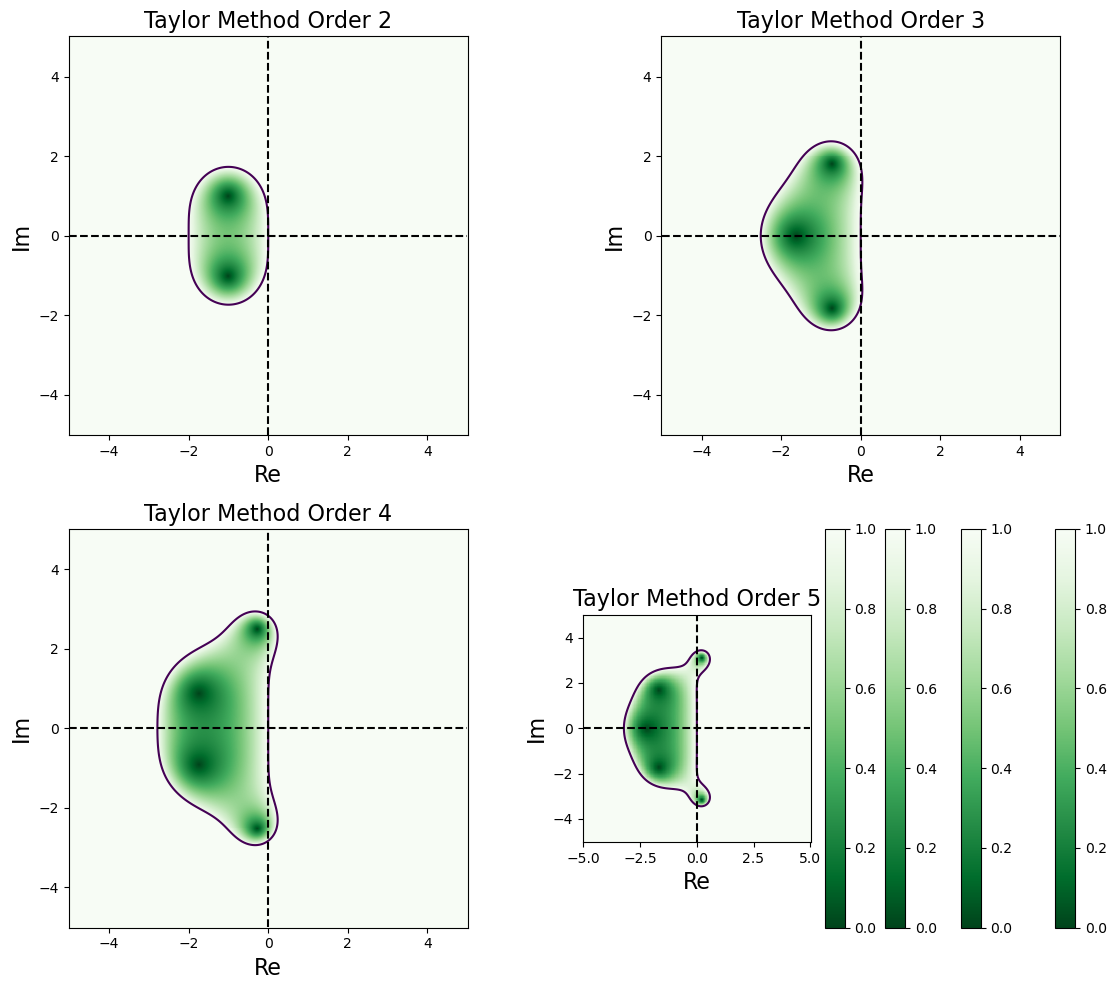

In [10]:
# Define Taylor Series methods of order 2 through 5
def R_taylor_2(z):
    return 1 + z + (z**2) / 2

def R_taylor_3(z):
    return 1 + z + (z**2) / 2 + (z**3) / 6

def R_taylor_4(z):
    return 1 + z + (z**2) / 2 + (z**3) / 6 + (z**4) / 24

def R_taylor_5(z):
    return 1 + z + (z**2) / 2 + (z**3) / 6 + (z**4) / 24 + (z**5) / 120

# Define plot parameters
x = numpy.linspace(-5, 5, 400)
y = numpy.linspace(-5, 5, 400)

# Create plots for stability regions
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

plot_stability_ssms(R_taylor_2, x, y, axes[0, 0], title="Taylor Method Order 2")
plot_stability_ssms(R_taylor_3, x, y, axes[0, 1], title="Taylor Method Order 3")
plot_stability_ssms(R_taylor_4, x, y, axes[1, 0], title="Taylor Method Order 4")
plot_stability_ssms(R_taylor_5, x, y, axes[1, 1], title="Taylor Method Order 5")

plt.tight_layout()
plt.show()


**(b)** [4 pt] Derive $R(z)$ for the RK2 method and show that it is equivalent to Taylor 2

**Extra Credit**  show that $R(Z)$ for RK4 is identical to Taylor-4 (in general this is true for explicit RK methods)

### Deriving $( R(z) $) for the RK2 Method and Verifying Equivalence to Taylor 2

The RK2 method for solving $( u' = \lambda u $) can be written as:

1. **Compute an intermediate step $( k_1 $):**
   $$
   k_1 = f(t_n, u^n) = \lambda u^n.
   $$

2. **Compute a second intermediate step $( k_2 $) using $( k_1 $):**
   $$
   k_2 = f\left(t_n + \frac{\Delta t}{2}, u^n + \frac{\Delta t}{2} k_1\right).
   $$
   Substituting $( f(u, t) = \lambda u $):
   $$
   k_2 = \lambda \left(u^n + \frac{\Delta t}{2} k_1\right) = \lambda \left(u^n + \frac{\Delta t}{2} \lambda u^n\right).
   $$
   Simplify:
   $$
   k_2 = \lambda u^n + \frac{\Delta t}{2} \lambda^2 u^n.
   $$

3. **Update $( u^{n+1} $) using $( k_1 $) and $( k_2 $):**
   $$
   u^{n+1} = u^n + \Delta t \left(\frac{k_1 + k_2}{2}\right).
   $$
   Substituting for $( k_1 $) and $( k_2 $):
   $$
   u^{n+1} = u^n + \Delta t \left(\frac{\lambda u^n + \lambda u^n + \frac{\Delta t}{2} \lambda^2 u^n}{2}\right).
   $$
   Simplify:
   $$
   u^{n+1} = u^n \left(1 + \Delta t \lambda + \frac{(\Delta t \lambda)^2}{2!}\right).
   $$

---

### Amplification Factor $( R(z) $)
The amplification factor $( R(z) $) is defined as:
$$
u^{n+1} = R(z) u^n,
$$
where $( z = \lambda \Delta t $). From the RK2 update, we find:
$$
R(z) = 1 + z + \frac{z^2}{2!}.
$$

---

### Comparison with Taylor 2
The Taylor series expansion of \( e^z \) is:
$$
e^z = 1 + z + \frac{z^2}{2!} + \dots
$$

The Taylor 2 method truncates this series to include terms up to \( \frac{z^2}{2!} \):
$$
R(z)_{\text{Taylor 2}} = 1 + z + \frac{z^2}{2!}.
$$

Thus, the amplification factor \( R(z) \) for RK2 is identical to the amplification factor for Taylor 2. Both methods produce the same result for the model problem \( u' = \lambda u \). 

## Question 3: Linear Multi-Step Schemes - Derivation and stability

[4] Derive the Adams-Moulton 2-step method 
$$
    U_{n+2} = U_{n+1} + \frac{\Delta t}{12} (-f_{n} + 8 f_{n+1} + 5 f_{n+2}),
$$

and its error estimate using the formula for the truncation error of general multi-step schemes
$$
\begin{aligned}
    T(t, u; \Delta t) &= \frac{1}{\Delta t}\left( \sum^r_{j=0} \alpha_j\right) u(t_n) + \left(\sum^r_{j=0} (j\alpha_j - \beta_j)\right) u'(t_n) + \Delta t \left(\sum^r_{j=0} \left (\frac{1}{2}j^2 \alpha_j - j \beta_j \right) \right) u''(t_n) \\
& \quad \quad + \cdots + \Delta t^{q - 1} \left (\sum^r_{j=0} \left(\frac{1}{q!} j^q \alpha_j - \frac{1}{(q-1)!} j^{q-1} \beta_j \right) \right) u^{(q)}(t_n) + \cdots
\end{aligned}$$

i.e. find $\alpha_j$s and $\beta_j$s that zero out terms of the truncation error out to some order.
Some Hint's 
* This is an Adams scheme with three levels so we already know the $\alpha$'s
* Therefore you only have to find the three $\beta$'s $\beta_0$, $\beta_1$ and $\beta_2$
* Use the above formula to find 3 equations for the 3 values of $\beta$
* The remainder term will be the order of the Truncation error

### Step 1: Zeroth Order ($ u(t_n) $):
So, for consistency we require:
$$
\sum_{j=0}^r \alpha_j = 0.
$$
Substitute $\alpha_0 = 0$, $\alpha_1 = -1$, $\alpha_2 = 1$:  
$$
0 - 1 + 1 = 0.
$$
Satisfying our condition.

---

### Step 2: First Order ($ u'(t_n) $):
For accuracy in the first derivative, we require:
$$
\sum_{j=0}^r (j \alpha_j - \beta_j) = 0.
$$
Substitute:  
$$
0 \cdot \alpha_0 - \beta_0 + 1 \cdot \alpha_1 - \beta_1 + 2 \cdot \alpha_2 - \beta_2 = 0.
$$
Simplify:  
$$
-\beta_0 - \beta_1 - \beta_2 = -2.
$$

---

### Step 3: Second Order ($ u''(t_n) $):
For accuracy in the second derivative, we require:
$$
\sum_{j=0}^r \left( \frac{1}{2} j^2 \alpha_j - j \beta_j \right) = 0.
$$
Substitute:  
$$
\frac{1}{2} \cdot 0^2 \cdot \alpha_0 - 0 \cdot \beta_0 + \frac{1}{2} \cdot 1^2 \cdot \alpha_1 - 1 \cdot \beta_1 + \frac{1}{2} \cdot 2^2 \cdot \alpha_2 - 2 \cdot \beta_2 = 0.
$$
Simplify:  
$$
-\frac{1}{2} - \beta_1 + 2 - 2 \beta_2 = 0.
$$

---

### Final System of Equations:
From the above conditions, we get three equations:
1. $\beta_0 + \beta_1 + \beta_2 = 1$,
2. $-\beta_0 - \beta_1 - \beta_2 = -2$,
3. $-\frac{1}{2} - \beta_1 + 2 - 2\beta_2 = 0$.

Solve this system for $\beta_0, \beta_1, \beta_2$. After simplification:  
$$
\beta_0 = -\frac{1}{12}, \quad \beta_1 = \frac{2}{3}, \quad \beta_2 = \frac{5}{12}.
$$

---

### Truncation Error Order:
The next non-zero term in the truncation error arises from the $ u^{(3)}(t_n) $ term:
$$
T(t, u; \Delta t) = \mathcal{O}(\Delta t^3).
$$

Thus, the Adams-Moulton 2-step method is a **third-order accurate scheme**.


**(c)** [8] Stability polynomials and Diagrams

Calculate the stability polynomial and plot the stability regions for
1. 2-step Adams-Moulton methods.
1. 3-step Adams-Bashforth methods

which are both 3rd-order methods.  Comment on the relative size of stability regions of these two methods and Taylor-3.

The 2-step method has the largest stability region, extending well into the negative real axis. The 3-step  method has the smallest region, restricted near the origin. The Taylor-3 method provides a middle ground with a larger stability region than Adams-Bashforth but still far smaller than Adams-Moulton. 

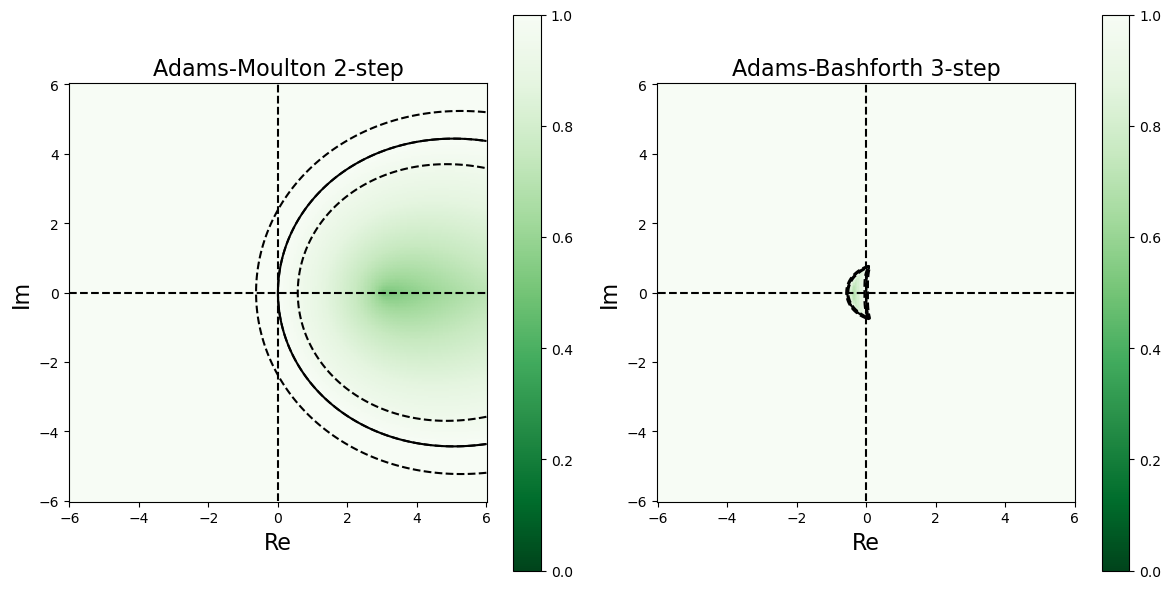

In [11]:
# Utility function for stability plotting, required to avoid contouring issues
def stability_plot(x, y, C, axes, title=None, continuous=True):
    """
    Utility function to make stability diagram given complex stability scalar C.
    """
    if continuous:
        Ch = C
    else:
        Ch = numpy.heaviside(C - 1, 0.0)
    X, Y = numpy.meshgrid(x, y)
    pcolor_plot = axes.pcolor(
        X, Y, Ch, vmin=0, vmax=1, cmap=plt.get_cmap("Greens_r"), shading="auto"
    )
    axes.contour(X, Y, C, colors="k", levels=[1.0])
    fig = plt.gcf()
    fig.colorbar(pcolor_plot, ax=axes)
    axes.plot(x, numpy.zeros(x.shape), "k--")
    axes.plot(numpy.zeros(y.shape), y, "k--")

    axes.set_xlabel("Re", fontsize=16)
    axes.set_ylabel("Im", fontsize=16)
    if title is not None:
        axes.set_title(title, fontsize=16)

    axes.set_aspect("equal")


# Robust stability plotter for LMM methods
def plot_stability_lmm_robust(pi_coeff, x, y, axes=None, title=None, continuous=True):
    """
    Robust stability region plotter for LMM schemes with error handling for contour levels.
    """
    X, Y = numpy.meshgrid(x, y)
    Z = X + 1j * Y
    if axes is None:
        fig = plt.figure(figsize=(8, 6))
        axes = fig.add_subplot(1, 1, 1)

    norm_max = numpy.empty(Z.shape)
    for i, row in enumerate(Z):
        for j, z in enumerate(row):
            norm_max[i, j] = max(numpy.abs(numpy.roots(pi_coeff(z))))

    stability_plot(x, y, norm_max, axes, title, continuous)

    # Dynamically adjust contour levels based on the data range, required to avoid contouring issues
    try:
        levels = [0.95, 1.0, 1.05]
        if numpy.max(norm_max) < 1.0:  # No valid contour at 1.0
            levels = numpy.linspace(numpy.min(norm_max), numpy.max(norm_max), 3)
        axes.contour(X, Y, norm_max, levels=levels, colors="k", linestyles="--")
    except UserWarning:
        print("Warning: Contour levels not found within data range.")


# Ok now I can define the functions
# Define stability polynomials for Adams-Moulton 2-step and Adams-Bashforth 3-step
def pi_adams_moulton_2(z):
    """Stability polynomial for Adams-Moulton 2-step method."""
    return numpy.array([1.0, -1.0, z / 12.0])  # Coefficients for AM-2 stability polynomial


def pi_adams_bashforth_3(z):
    """Stability polynomial for Adams-Bashforth 3-step method."""
    return numpy.array([1.0, -(1.0 + 23.0 * z / 12.0), 16.0 * z / 12.0, -5.0 * z / 12.0])


# Define grid for plotting
x = numpy.linspace(-6, 6, 300)
y = numpy.linspace(-6, 6, 300)

# Plot stability regions for Adams-Moulton 2-step and Adams-Bashforth 3-step
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Adams-Moulton 2-step stability polynomial
plot_stability_lmm_robust(
    pi_adams_moulton_2,
    x,
    y,
    axes=axes[0],
    title="Adams-Moulton 2-step",
    continuous=True,
)

# Adams-Bashforth 3-step stability polynomial
plot_stability_lmm_robust(
    pi_adams_bashforth_3,
    x,
    y,
    axes=axes[1],
    title="Adams-Bashforth 3-step",
    continuous=True,
)

plt.tight_layout()
plt.show()

YOUR ANSWER HERE

**(d)**  [6] In class we demonstrated that the Leap-frog method seemed to be unstable, at least for the examples we showed.  Use your tools for stability analysis of Linear Multi-step methods to analyze the general stability of the Leap Frog method and plot its stability diagram. In particular, comment on the case we showed in class for $\lambda$ real and negative.

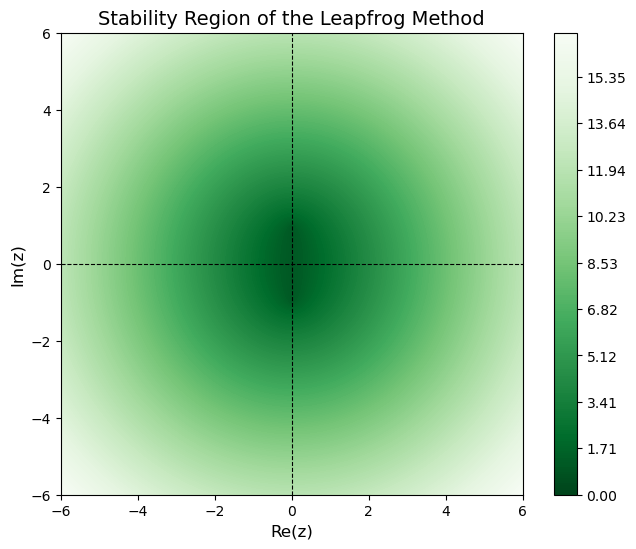

In [12]:
# Define the stability polynomial for the Leapfrog method
def leapfrog_stability_poly(z):
    """Returns the coefficients of the Leapfrog stability polynomial."""
    return [1, -2 * z, -1]

# Set up the grid for plotting the stability region
x = numpy.linspace(-6, 6, 300)
y = numpy.linspace(-6, 6, 300)

# Define a function to calculate the max |xi| from the roots of the stability polynomial
def leapfrog_stability(z):
    roots = numpy.roots(leapfrog_stability_poly(z))
    return max(numpy.abs(roots))

# Plot stability regions
fig, ax = plt.subplots(figsize=(8, 6))

X, Y = numpy.meshgrid(x, y)
Z = X + 1j * Y

# Compute the stability metric (max |xi|) for each point in the complex plane
stability_values = numpy.empty(Z.shape)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        stability_values[i, j] = leapfrog_stability(Z[i, j])

# Dynamically adjust the contour level
min_val, max_val = numpy.min(stability_values), numpy.max(stability_values)
contour_level = 1.0 if min_val <= 1.0 <= max_val else None

# Plot the stability region
stability_plot = ax.contourf(X, Y, stability_values, levels=numpy.linspace(0, max(2, max_val), 200), cmap="Greens_r")

# Plot the stability contour only if the contour level exists
if contour_level:
    contour = ax.contour(X, Y, stability_values, levels=[contour_level], colors="purple", linewidths=2)

fig.colorbar(stability_plot, ax=ax)

# Add dashed lines for axes
ax.axhline(0, color="k", linestyle="--", linewidth=0.8)
ax.axvline(0, color="k", linestyle="--", linewidth=0.8)

# Label the plot
ax.set_title("Stability Region of the Leapfrog Method", fontsize=14)
ax.set_xlabel("Re(z)", fontsize=12)
ax.set_ylabel("Im(z)", fontsize=12)
ax.set_aspect("equal")

plt.show()
